# 삼성전자 데이터 전처리 파이널 프로젝트
# 반도체 공정 데이터를 바탕으로 한 데이터 전처리
> - 데이터셋 설명  
>> UCI SECOM 반도체 공정 데이터셋  
데이터 출처 [https://archive.ics.uci.edu/ml/datasets/SECOM](https://archive.ics.uci.edu/ml/datasets/SECOM)  
>>> - 총 1576샘플, datetime 컬럼과 590개 공정데이터, target 데이터
각 컬럼은 반도체 생산 공정 설비에서 수집된 데이터  
다만 데이터 수집 이슈로 인해 데이터가 조각 난 상태이다.
>>> - 1576개의 완제품의 불량 여부 레이블 데이터인 target 데이터  
전처리 된 불량 여부 레이블은 정상데이터는 0, 불량데이터는 1  
>>> - 2008년 1월 부터 12월에 걸쳐 수집 된 데이터이다.  


> - 목적
>> 해당 데이터셋의 목적은 불량데이터 판별에 필요한 데이터를 정제함에 있다.
수집 된 데이터를 바탕으로 불량 생산 추이를 확인하기 위한 인사이트를 얻는 목적으로 진행한다.  

> - 진행방식
>> 아래 굵은 글씨로 작성 되어있는 테스트를 수행하며 테스크 아래 수행 결과값과 비교하며 프로젝트를 진행한다.  
코드 실행 결과값이 없을 경우 # 결과값 없음, 코드 실행 결과가 결과값이랑 다를 수 있는 경우 # 결과값 다를 수 있음으로 가늠한다.

# 라이브러리 import 

In [1]:
# numpy, seaborn, pandas, matplotlib import
# CODE HERE
import pandas as pd


# 추가적으로 필요한 라이브러리 및 옵션값은 코드를 제공해 드립니다.
import warnings
warnings.filterwarnings(action='ignore')

pd.options.display.max_columns=600 # 변수 최대표시 설정 600개
pd.options.display.max_info_columns=600 # info 최대표시 변수 갯수 설정

In [45]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 데이터 로딩 및 확인 (완)

**semiconductor1.csv 파일을 읽어들여 df1로 저장**  
**semiconductor2.csv 파일을 읽어들여 df2로 저장**  
원본데이터는 X, y 각각 링크형태로 제공하지만 편의를 위해 강사가 전처리를 진행한 데이터셋을 활용

In [2]:
# CODE HERE
df1 = pd.read_csv('./semiconductor1.csv', encoding='cp949')
df2 = pd.read_csv('./semiconductor2.csv', encoding='cp949')
df1

datetime        0        1          2          3       4  \
0    19/07/2008 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1    19/07/2008 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2    19/07/2008 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3    19/07/2008 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4    19/07/2008 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
..                   ...      ...      ...        ...        ...     ...   
995  21/09/2008 18:12:00  2982.40  2528.21        NaN        NaN     NaN   
996  21/09/2008 19:19:00  2901.62  2569.45  2223.9000  1745.3724  1.9974   
997  21/09/2008 20:35:00  3053.64  2351.94  2206.1444  1876.9899  2.0607   
998  21/09/2008 21:54:00  2938.84  2453.25  2188.5444  1251.2688  0.7980   
999  21/09/2008 22:02:00  3045.11  2444.87  2215.1778  2192.1867  1.8829   

         5         6       7       8       9      10      11        12   13  \
0    100.0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   
1    100.0  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0   
2    100.0   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   
3    100.0  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   
4    100.0  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0   
..     ...       ...     ...     ...     ...     ...     ...       ...  ...   
995    NaN       NaN     NaN  1.4805  0.0123  0.0009  0.9686  202.3658  0.0   
996  100.0   96.7567  0.1241  1.5950 -0.0163  0.0061  0.9835  195.7092  0.0   
997  100.0   95.9511  0.1246  1.4587  0.0284 -0.0070  0.9670  201.1963  0.0   
998  100.0  103.5944  0.1199  1.5136  0.0225 -0.0269  0.9711  201.8856  0.0   
999  100.0   85.6589  0.1237  1.4193  0.0113 -0.0007  0.9787  196.9404  0.0   

          14        15       16      17        18       19      20       21  \
0     7.9558  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00   
1    10.1548  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50   
2     9.5157  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75   
3     9.6052  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25   
4    10.5661  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25   
..       ...       ...      ...     ...       ...      ...     ...      ...   
995  10.8885  420.1216   9.9446  0.9739  192.4212  12.3996  1.4270 -5420.25   
996   8.4954  399.5080   9.2262  0.9791  186.4830  12.5237  1.4131 -5525.00   
997  10.4986  406.6259   9.7555  0.9732  191.4408  12.3578  1.4180 -5327.50   
998   9.5197  425.3996   9.6144  0.9654  192.2712  12.5682  1.3914 -5194.75   
999   8.2633  417.4764   9.4102  0.9806  187.5301  12.5106  1.4169 -6411.00   

          22       23         24      25      26      27       28      29  \
0    2916.50 -4043.75   751.0000  0.8955  1.7730  3.0490  64.2333  2.0222   
1    2604.25 -3498.75 -1640.2500  1.2973  2.0143  7.3900  68.4222  2.2667   
2    2701.75 -4047.00 -1916.5000  1.3122  2.0295  7.5788  67.1333  2.3333   
3    2648.25 -4515.00 -1657.2500  1.3137  2.0038  7.3145  62.9333  2.6444   
4    2635.25 -3987.50   117.0000  1.2887  1.9912  7.2748  62.8333  3.1556   
..       ...      ...        ...     ...     ...     ...      ...     ...   
995  2918.25 -4355.25 -4705.3333  1.2820  1.9523  7.2453  76.2444  1.7556   
996  2691.50  -366.75  -126.0000  1.2680  1.9858  7.3317  69.9444  2.3111   
997  2618.25 -4360.75    12.7500  1.2868  1.9990  7.3172  73.7667  2.1556   
998  2469.00 -5070.25  -272.5000  1.3148  1.9765  7.3505  68.5556  2.6444   
999  2936.25 -4642.00  1423.7500  1.0037  1.8733  5.1348  66.0333  3.1778   

         30      31       32      33       34       35       36       37  \
0    0.1632  3.5191  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141   
1    0.2102  3.4171  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193   
2    0.1734  3.5986  84.7569  8.6590  50.1530  64.11

In [7]:
# 출력 결과값 없음

## df1 데이터프레임의 첫 5개 관측치 확인 (완)

In [17]:
# CODE HERE
df1.head()

datetime        0        1          2          3       4      5  \
0  19/07/2008 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  19/07/2008 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  19/07/2008 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  19/07/2008 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  19/07/2008 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8       9      10      11        12   13       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   9.5157   
3  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   9.6052   
4  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0  10.5661   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   
3  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
4  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   
3 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
4 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   
3  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
4  86.3269  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364   

      40     41    42        43       44        45        46      47  \
0  61.29  4.515  70.0  352.7173  10.1841  130.3691  723.3092  1.3072   
1  78.25  2.773  70.0  352.2445  10.0373  133.1727  724.8264  1.2887   
2  14.37  5.434  70.0  364.3782   9.8783  131.8027  734.7924  1.2992   
3  76.90  1.279  70.0  363.0273   9.9305  131.8027  733.8778  1.3027   
4  76.39  2.209  70.0  353.3400  10.4091  176.3136  789.7523  1.0341   

         48   49        50        51   52     53     54      55      56  \
0  141.2282  1.0  624.3145  218.3174  0.0  4.592  4.841  2834.0  0.9317   
1  145.8445  1.0  631.2618  205.1695  0.0  4.590  4.842  2853.0  0.9324   
2  141.0845  1.0  637.2655  185.7574  0.0  4.486  4.748  2936.0  0.9139   
3  142.5427  1.0  637.3727  189.9079  0.0  4.486  4.748  2936.0  0.9139   
4  138.0882  1.0  667.7418  233.5491  0.0  4.624  4.894  2865.0  0.9298   

       57      58       59        60       61        62       63       64  \
0  0.9484  4.7057  -1.7264  350.9264  10.6231  108.6427  16.1445  21.7264   
1  0.9479  4.6820   0.8073  352.0073  10.3092  113.9800  10.9036  19.1927   
2  0.9447  4.5873  23.8245  364.5364  10.1685  115.6273  11.3019  16.1755   
3  0.9447  4.5873  24.3791  361.4582  10.2112  116.1818  13.5597  15.6209   
4  0.9449  4.6414 -12.2945  355.0809   9.7948  144.0191  21.9782  32.2945   

        65        66      67        68   69        70       71        72  \
0  29.5367  693.7724  0.9226  148.6009  1.0  608.1700  84.0793       NaN   
1  27.6301  697.1964  1.1598  154.3709  1.0  620.3582  82.3494       NaN   
2  24.2829  710.5095  0.8694  145.8000  1.0  625.9636  84.7681  140.69

datetime        0        1          2          3       4      5  \
0  19/07/2008 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602  100.0   
1  19/07/2008 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  100.0   
2  19/07/2008 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102  100.0   
3  19/07/2008 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  100.0   
4  19/07/2008 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.0   

          6       7       8       9      10      11        12   13       14  \
0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   7.9558   
1  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0  10.1548   
2   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   9.5157   
3  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   9.6052   
4  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0  10.5661   

         15       16      17        18       19      20       21       22  \
0  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00  2916.50   
1  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50  2604.25   
2  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75  2701.75   
3  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25  2648.25   
4  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25  2635.25   

        23       24      25      26      27       28      29      30      31  \
0 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191   
1 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171   
2 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986   
3 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813   
4 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728   

        32      33       34       35       36       37       38        39  \
0  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555  117.5132   
1  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241  118.1188   
2  84.7569  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327  118.6128   
3  84.9105  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867  117.0442   
4  86.3269  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468  121.4364   

      40     41    42        43       44        45        46      47  \
0  61.29  4.515  70.0  352.7173  10.1841  130.3691  723.3092  1.3072   
1  78.25  2.773  70.0  352.2445  10.0373  133.1727  724.8264  1.2887   
2  14.37  5.434  70.0  364.3782   9.8783  131.8027  734.7924  1.2992   
3  76.90  1.279  70.0  363.0273   9.9305  131.8027  733.8778  1.3027   
4  76.39  2.209  70.0  353.3400  10.4091  176.3136  789.7523  1.0341   

         48   49        50        51   52     53     54      55      56  \
0  141.2282  1.0  624.3145  218.3174  0.0  4.592  4.841  2834.0  0.9317   
1  145.8445  1.0  631.2618  205.1695  0.0  4.590  4.842  2853.0  0.9324   
2  141.0845  1.0  637.2655  185.7574  0.0  4.486  4.748  2936.0  0.9139   
3  142.5427  1.0  637.3727  189.9079  0.0  4.486  4.748  2936.0  0.9139   
4  138.0882  1.0  667.7418  233.5491  0.0  4.624  4.894  2865.0  0.9298   

       57      58       59        60       61        62       63       64  \
0  0.9484  4.7057  -1.7264  350.9264  10.6231  108.6427  16.1445  21.7264   
1  0.9479  4.6820   0.8073  352.0073  10.3092  113.9800  10.9036  19.1927   
2  0.9447  4.5873  23.8245  364.5364  10.1685  115.6273  11.3019  16.1755   
3  0.9447  4.5873  24.3791  361.4582  10.2112  116.1818  13.5597  15.6209   
4  0.9449  4.6414 -12.2945  355.0809   9.7948  144.0191  21.9782  32.2945   

        65        66      67        68   69        70       71        72  \
0  29.5367  693.7724  0.9226  148.6009  1.0  608.1700  84.0793       NaN   
1  27.6301  697.1964  1.1598  154.3709  1.0  620.3582  82.3494       NaN   
2  24.2829  710.5095  0.8694  145.8000  1.0  625.9636  84.7681  140.69

날짜데이터인 datetime 변수 그리고 완제품 불량 여부에 해당하는 target변수를 포함한 공정데이터를 확인했습니다.  
각 공정데이터는 순서대로 나열 되어있으며 1개의 관측치는 완제품 한개에 해당하는 데이터임도 확인했습니다.

## 데이터 변수 삭제 (완)
**df2 데이터에는 분석에 불필요한 Unnamed: 0 변수가 포함되어 있습니다. 이를 삭제 처리 한 후 df1, df2의 shape을 확인 해봅니다.**

In [23]:
df1.shape, df2.shape

((1000, 592), (567, 593))

In [24]:
# CODE HERE
del df2['Unnamed: 0']

In [25]:
# 편한 방법 사용하시면 됩니다.
df1.shape, df2.shape

((1000, 592), (567, 592))

## 데이터 병합 (완)
**위에서 불러들인 데이터프레임을 바탕으로 데이터를 병합하려 합니다.**  
**데이터를 꼼꼼히 살펴보고 어떤 병합방법을 사용하려 하는지 작성하고 어떤 이유에서 해당 병합방식을 사용하려 하는지 데이터에 근거하여 기술 해 봅시다.**

In [34]:
df1.columns, df2.columns

(Index(['datetime', '0', '1', '2', '3', '4', '5', '6', '7', '8',
        ...
        '581', '582', '583', '584', '585', '586', '587', '588', '589',
        'target'],
       dtype='object', length=592),
 Index(['datetime', '0', '1', '2', '3', '4', '5', '6', '7', '8',
        ...
        '581', '582', '583', '584', '585', '586', '587', '588', '589',
        'target'],
       dtype='object', length=592))

In [35]:
df1['datetime'], df2['datetime']

(0      19/07/2008 11:55:00
 1      19/07/2008 12:32:00
 2      19/07/2008 13:17:00
 3      19/07/2008 14:43:00
 4      19/07/2008 15:22:00
               ...         
 995    21/09/2008 18:12:00
 996    21/09/2008 19:19:00
 997    21/09/2008 20:35:00
 998    21/09/2008 21:54:00
 999    21/09/2008 22:02:00
 Name: datetime, Length: 1000, dtype: object,
 0      22/09/2008 00:12:00
 1      22/09/2008 00:28:00
 2      22/09/2008 00:47:00
 3      22/09/2008 01:43:00
 4      22/09/2008 03:51:00
               ...         
 562    16/10/2008 15:13:00
 563    16/10/2008 20:49:00
 564    17/10/2008 05:26:00
 565    17/10/2008 06:01:00
 566    17/10/2008 06:07:00
 Name: datetime, Length: 567, dtype: object)

In [ ]:
# TEXT HERE
# 필요에 따라 셀을 추가하고 데이터프레임의 값을 확인하며 진행하셔야 합니다.
# 병합방식에 따른 근거를 꼭 기술 해주셔야 합니다.
df1 과 df2 의 변수 갯수가 동일하며, 데이터타입이 object로 동일하다
datetime 칼럼에서 df1 다음 df2 가 연속 data 로 axis=0 으로 행 방향으로 병합이 적당하다

## df 데이터프레임에 df1, df2를 병합한 데이터를 저장 후 shape 확인 (완)

In [40]:
# CODE HERE
df = pd.concat([df1, df2], ignore_index=True)

In [41]:
df.shape

(1567, 592)

In [39]:
df

datetime        0        1          2          3       4  \
0     19/07/2008 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   
1     19/07/2008 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294   
2     19/07/2008 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   
3     19/07/2008 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204   
4     19/07/2008 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334   
...                   ...      ...      ...        ...        ...     ...   
1562  16/10/2008 15:13:00  2899.41  2464.36  2179.7333  3085.3781  1.4843   
1563  16/10/2008 20:49:00  3052.31  2522.55  2198.5667  1124.6595  0.8763   
1564  17/10/2008 05:26:00  2978.81  2379.78  2206.3000  1110.4967  0.8236   
1565  17/10/2008 06:01:00  2894.92  2532.01  2177.0333  1183.7287  1.5726   
1566  17/10/2008 06:07:00  2944.92  2450.76  2195.4444  2914.1792  1.5978   

          5         6       7       8       9      10      11        12   13  \
0     100.0   97.6133  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396  0.0   
1     100.0  102.3433  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470  0.0   
2     100.0   95.4878  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179  0.0   
3     100.0  104.2367  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482  0.0   
4     100.0  100.3967  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424  0.0   
...     ...       ...     ...     ...     ...     ...     ...       ...  ...   
1562  100.0   82.2467  0.1248  1.3424 -0.0045 -0.0057  0.9579  203.9867  0.0   
1563  100.0   98.4689  0.1205  1.4333 -0.0061 -0.0093  0.9618  204.0173  0.0   
1564  100.0   99.4122  0.1208     NaN     NaN     NaN     NaN       NaN  NaN   
1565  100.0   98.7978  0.1213  1.4622 -0.0072  0.0032  0.9694  197.2448  0.0   
1566  100.0   85.1011  0.1235     NaN     NaN     NaN     NaN       NaN  NaN   

           14        15       16      17        18       19      20       21  \
0      7.9558  414.8710  10.0433  0.9680  192.3963  12.5190  1.4026 -5419.00   
1     10.1548  414.7347   9.2599  0.9701  191.2872  12.4608  1.3825 -5441.50   
2      9.5157  416.7075   9.3144  0.9674  192.7035  12.5404  1.4123 -5447.75   
3      9.6052  422.2894   9.6924  0.9687  192.1557  12.4782  1.4011 -5468.25   
4     10.5661  420.5925  10.3387  0.9735  191.6037  12.4735  1.3888 -5476.25   
...       ...       ...      ...     ...       ...      ...     ...      ...   
1562  11.7692  419.3404  10.2397  0.9693  193.7470  12.5373  1.4072 -5418.75   
1563   9.1620  405.8178  10.2285  0.9696  193.7889  12.4020  1.3949 -6408.75   
1564      NaN       NaN      NaN     NaN       NaN  12.4555  1.4256 -5153.25   
1565   9.7354  401.9153   9.8630  0.9740  187.3818  12.3937  1.3868 -5271.75   
1566      NaN       NaN      NaN     NaN       NaN  12.4790  1.4048 -5319.50   

           22       23       24      25      26      27       28      29  \
0     2916.50 -4043.75   751.00  0.8955  1.7730  3.0490  64.2333  2.0222   
1     2604.25 -3498.75 -1640.25  1.2973  2.0143  7.3900  68.4222  2.2667   
2     2701.75 -4047.00 -1916.50  1.3122  2.0295  7.5788  67.1333  2.3333   
3     2648.25 -4515.00 -1657.25  1.3137  2.0038  7.3145  62.9333  2.6444   
4     2635.25 -3987.50   117.00  1.2887  1.9912  7.2748  62.8333  3.1556   
...       ...      ...      ...     ...     ...     ...      ...     ...   
1562  2608.00 -6228.25   356.00  1.2817  1.9540  7.0793  71.1444  2.2222   
1563  2277.50 -3675.50   339.00  1.0870  1.8023  5.1515  72.8444  2.0000   
1564  2707.00 -4102.00 -1226.00  1.2930  1.9435  7.2315  71.2667  2.2333   
1565  2676.50 -4001.50   394.75  1.2875  1.9880  7.3255  70.5111  2.9667   
1566  2668.00 -3951.75  -425.00  1.3020  2.0085  7.3395  73.0667  2.5889   

          30      31       32      33       34       35       36       37  \
0     0.1632  3.5191  83.3971  9.5126  50.6170  64.2588  49.3830  66.3141   
1     0.2102  3.4171  84.9052  9.7997  50.6596  64.2828  49.3404  64.9193   
2     0.1734  3.5986  84.7

조각난 데이터를 병합하여 분석에 필요한 형태로 병합을 완료 하였습니다.  
앞으로는 위의 데이터를 사용하여 분석 및 여러 전처리를 진행하겠습니다.  

## sns 패키지의 heatmap을 사용하여 df의 상관계수를 시각화 해 봅시다. (완)

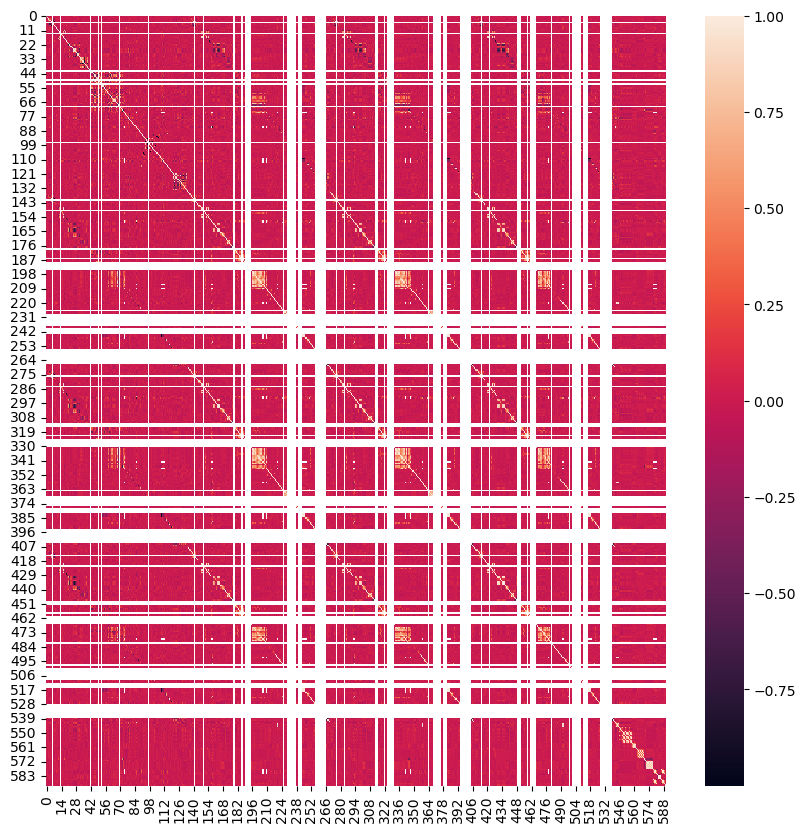

In [48]:
# CODE HERE
plt.figure(figsize=(10, 10))
sns.heatmap(data=df.corr())
plt.show()

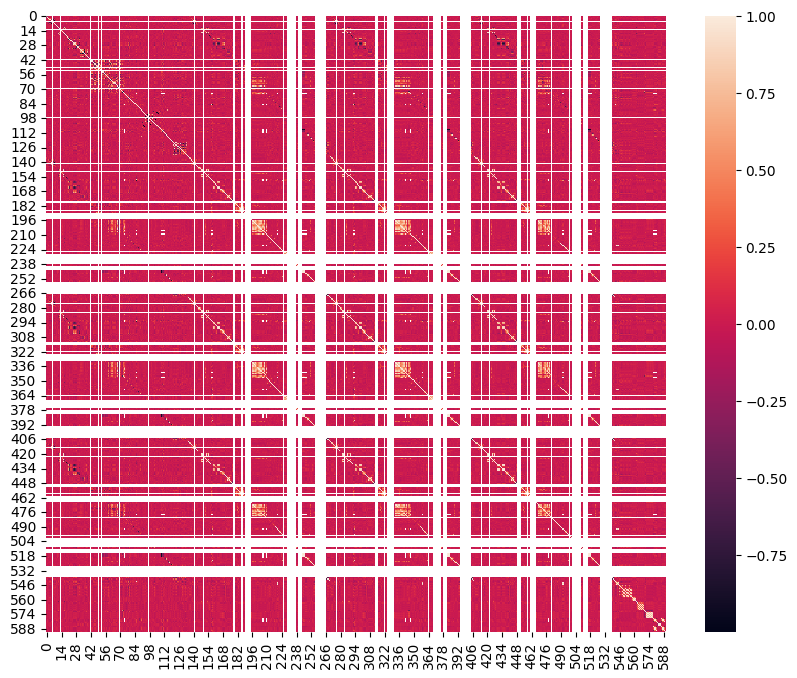

상관계수 시각화의 목적은 target데이터에 영향을 주는 변수를 선별하기 위한 목적과 함께, 변수간 영향을 주고 받는 변수를 확인하기 위함도 있습니다.  
위 시각화 그래프에서 흰색선의 경우 자기상관에 해당하는 수치입니다. 이는 데이터의 값이 같은 변수가 많은 이유입니다.  
이러한 변수는 분석 과정에서 불필요한 데이터이기에 해당 변수들의 갯수 및 위치를 파악 해 보도록 하겠습니다.

## 아래 반복문 코드를 참고하여 각 변수의 고윳값을 출력 해 봅시다. (완)

In [51]:
df.columns.unique() == 1

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [60]:
# CODE HERE
# 주어진 코드에 물음표에 해당하는 부분에 본인의 코드를 추가하여 아래 결과값이 나올 수 있도록 코드를 작성 해 봅시다.
for col_nm in df.columns:
    # hint 조건문을 사용하여 각 변수의 고윳값의 갯수를 확인하고 갯수가 1이라면
    if df[col_nm].nunique() == 1:
        # hint 변수명과 고윳값의 갯수를 출력
        print(col_nm, df[col_nm].nunique())

5 1
13 1
42 1
49 1
52 1
69 1
97 1
141 1
149 1
178 1
179 1
186 1
189 1
190 1
191 1
192 1
193 1
194 1
226 1
229 1
230 1
231 1
232 1
233 1
234 1
235 1
236 1
237 1
240 1
241 1
242 1
243 1
256 1
257 1
258 1
259 1
260 1
261 1
262 1
263 1
264 1
265 1
266 1
276 1
284 1
313 1
314 1
315 1
322 1
325 1
326 1
327 1
328 1
329 1
330 1
364 1
369 1
370 1
371 1
372 1
373 1
374 1
375 1
378 1
379 1
380 1
381 1
394 1
395 1
396 1
397 1
398 1
399 1
400 1
401 1
402 1
403 1
404 1
414 1
422 1
449 1
450 1
451 1
458 1
461 1
462 1
463 1
464 1
465 1
466 1
481 1
498 1
501 1
502 1
503 1
504 1
505 1
506 1
507 1
508 1
509 1
512 1
513 1
514 1
515 1
528 1
529 1
530 1
531 1
532 1
533 1
534 1
535 1
536 1
537 1
538 1


5 1
13 1
42 1
49 1
52 1
69 1
97 1
141 1
149 1
178 1
179 1
186 1
189 1
190 1
191 1
192 1
193 1
194 1
226 1
229 1
230 1
231 1
232 1
233 1
234 1
235 1
236 1
237 1
240 1
241 1
242 1
243 1
256 1
257 1
258 1
259 1
260 1
261 1
262 1
263 1
264 1
265 1
266 1
276 1
284 1
313 1
314 1
315 1
322 1
325 1
326 1
327 1
328 1
329 1
330 1
364 1
369 1
370 1
371 1
372 1
373 1
374 1
375 1
378 1
379 1
380 1
381 1
394 1
395 1
396 1
397 1
398 1
399 1
400 1
401 1
402 1
403 1
404 1
414 1
422 1
449 1
450 1
451 1
458 1
461 1
462 1
463 1
464 1
465 1
466 1
481 1
498 1
501 1
502 1
503 1
504 1
505 1
506 1
507 1
508 1
509 1
512 1
513 1
514 1
515 1
528 1
529 1
530 1
531 1
532 1
533 1
534 1
535 1
536 1
537 1
538 1


## 위 작업의 결과값으로 확인한 변수를 삭제한 후 df의 shape을 확인합니다. (완)
위 작업 코드를 참고하셔서 반복문을 사용하셔도 좋고, 편한 방식을 사용하시면 됩니다.

In [62]:
# CODE HERE
for col_nm in df.columns:
    if df[col_nm].nunique() == 1:
        del df[col_nm]

In [63]:
df.shape

(1567, 476)

In [11]:
df.shape

(1567, 476)

## sns heatmap 다시 확인 (완)

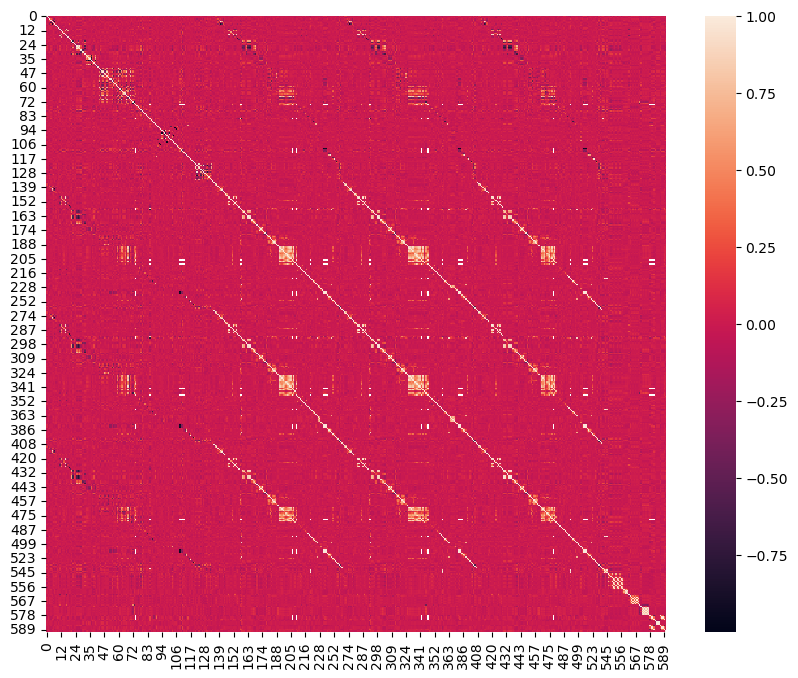

In [86]:
# CODE HERE
plt.figure(figsize=(10, 8))
sns.heatmap(data=df.corr())
plt.show()

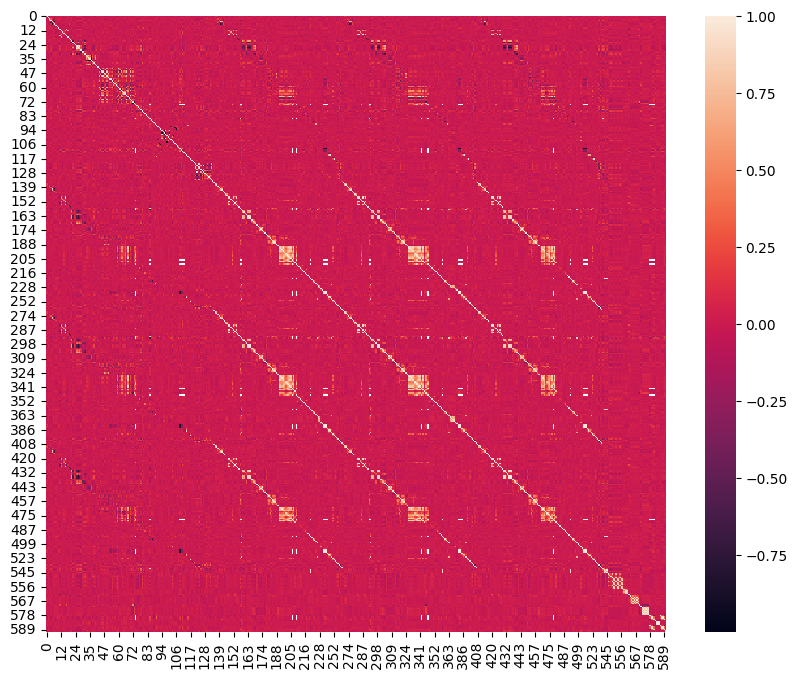

## 불량률을 계산하고 아래와 같은 형식으로 출력 해 봅시다. (완)

In [81]:
# CODE HERE target=1 불량
nok_target = df['target'].sum() / len(df) * 100
print(f'불량률 : {nok_target} %')

불량률 : 6.636885768985322 %


In [13]:
# 숫자만 맞으면 출력형식 동일하게 출력하지 않으셔도 됩니다. 

불량률 : 6.636885768985322 %


## target 데이터를 sns countplot으로 시각화도 진행해봅니다 (완)

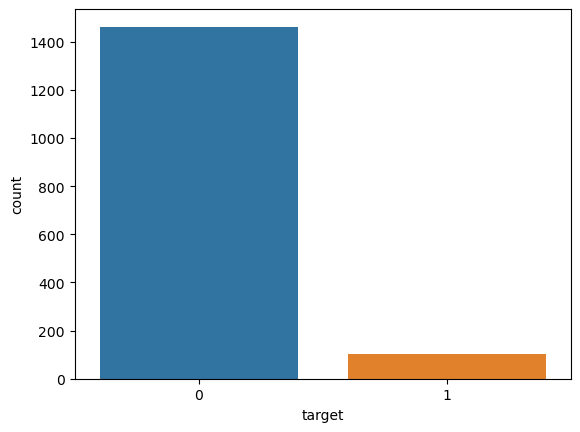

In [83]:
# CODE HERE
sns.countplot(data=df, x='target')
plt.show()

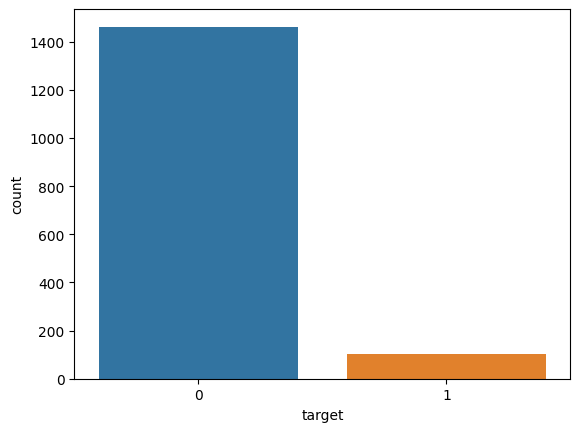

## 결측치 확인 및 시각화
**분석 과정에 불필요한 결측데이터 확인을 위해 결측 데이터를 시각화합니다.**

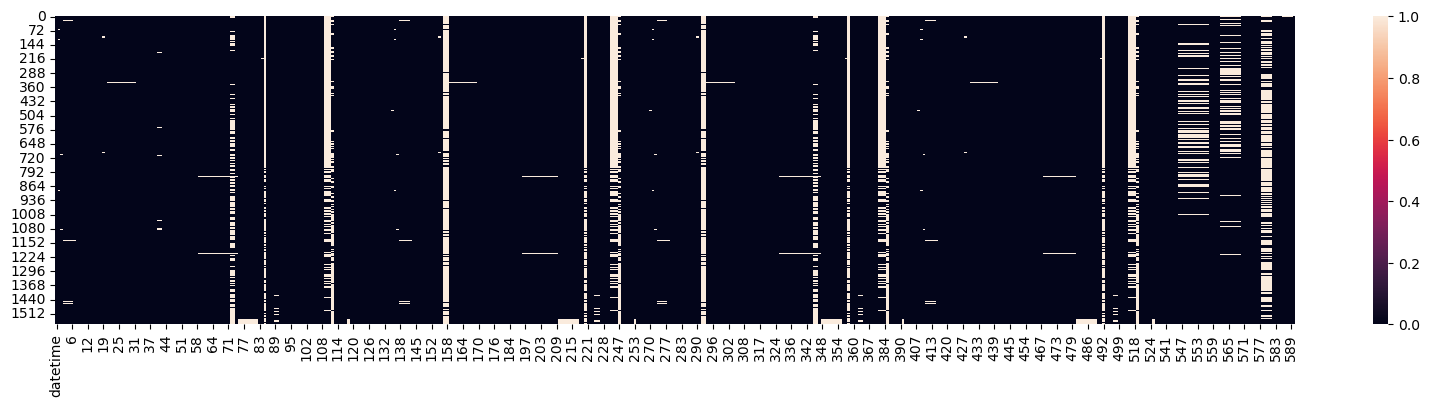

In [87]:
# CODE HERE
# 아래 코드 중 ?를 채워넣어 아래와 같이 데이터프레임의 결측치 분포를 시각화 합니다.
plt.figure(figsize=(20, 4))
sns.heatmap(data=df.isna())
plt.show()

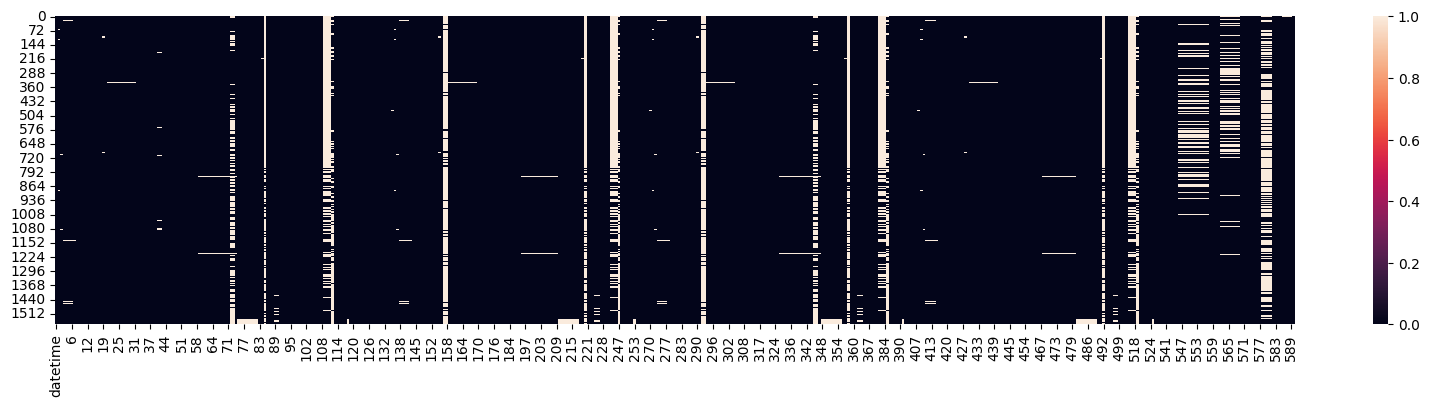

# 결측치 처리 (완)
데이터분석 과정에서 결측치 유무는 분석의 결과에 노이즈를 발생 시킵니다.  
분석의 용이성을 위해 결측치 비율이 60% 이상인 변수를 삭제하겠습니다.

**결측치 비율이 60%가 넘는 변수를 선택하여 출력해봅시다.**

In [88]:
# CODE 제공 그대로 실행 시키시면 됩니다.
col_list = []
for col_nm in df.columns:
    # df의 변수명을 순환하면서 각 변수 데이터에 접근하고 결측치 비율을 계산 후 결측치 비율이 60% 이상이면 해당 변수명을 리스트에 저장
    if df[col_nm].isna().sum() / len(df) >= 0.6:
        col_list.append(col_nm)
col_list

['85',
 '109',
 '110',
 '111',
 '157',
 '158',
 '220',
 '244',
 '245',
 '246',
 '292',
 '293',
 '358',
 '382',
 '383',
 '384',
 '492',
 '516',
 '517',
 '518',
 '578',
 '579',
 '580',
 '581']

## 결측치 비율 조건에 따른 변수 선택 (완)
**위에 제공 된 코드를 참고하여 결측치 비율이 60% 미만인 변수만을 선택하여 df에 저장 후 shape을 확인 합니다.**  
**각자가 구현할 수 있는 방법으로 해결합니다 위 문제에서 제공 된 코드를 수정하셔도 좋고, 확인 한 변수를 하나씩 제거 해도 좋습니다.**

In [90]:
df.shape

(1567, 476)

In [97]:
# CODE HERE
for col_nm in df.columns:
    if df[col_nm].isna().sum() / len(df) >= 0.6:
        del df[col_nm]
df.shape

(1567, 452)

(1567, 452)

## 결측치 비율이 높은 변수를 삭제 하였어도 여전히 결측치가 존재합니다. 0번 변수의 결측치 갯수와 결측치 비율을 계산합니다. (완)

In [99]:
# CODE HERE
df['0'].isna().sum()

6

In [15]:
# 결측치 갯수 확인


6

In [101]:
# CODE HERE
df['0'].isna().sum() / len(df) * 100

0.3828972559029994

In [16]:
# 결측치 비율 확인


0.3828972559029994

0번 변수의 결측치 비율은 약 0.38% 입니다. 이는 변수의 전체 분포에 영향을 주기 어려운 비율입니다.  
## 평균값 계산이 되지 않는 datetime 변수를 제외한 모든 변수의 결측치를 각 변수의 평균값으로 채워 넣은 후 info() 메소드로 결측치 정보를 확인합니다. (완)

In [106]:
# CODE HERE
for col_nm in df.columns[1:]:
    df[col_nm].fillna(df[col_nm].mean(), inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 452 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    datetime  1567 non-null   object 
 1    0         1567 non-null   float64
 2    1         1567 non-null   float64
 3    2         1567 non-null   float64
 4    3         1567 non-null   float64
 5    4         1567 non-null   float64
 6    6         1567 non-null   float64
 7    7         1567 non-null   float64
 8    8         1567 non-null   float64
 9    9         1567 non-null   float64
 10   10        1567 non-null   float64
 11   11        1567 non-null   float64
 12   12        1567 non-null   float64
 13   14        1567 non-null   float64
 14   15        1567 non-null   float64
 15   16        1567 non-null   float64
 16   17        1567 non-null   float64
 17   18        1567 non-null   float64
 18   19        1567 non-null   float64
 19   20        1567 non-null   float64
 20   21    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1567 entries, 0 to 1566
Data columns (total 452 columns):
 #    Column    Non-Null Count  Dtype  
---   ------    --------------  -----  
 0    datetime  1567 non-null   object 
 1    0         1567 non-null   float64
 2    1         1567 non-null   float64
 3    2         1567 non-null   float64
 4    3         1567 non-null   float64
 5    4         1567 non-null   float64
 6    6         1567 non-null   float64
 7    7         1567 non-null   float64
 8    8         1567 non-null   float64
 9    9         1567 non-null   float64
 10   10        1567 non-null   float64
 11   11        1567 non-null   float64
 12   12        1567 non-null   float64
 13   14        1567 non-null   float64
 14   15        1567 non-null   float64
 15   16        1567 non-null   float64
 16   17        1567 non-null   float64
 17   18        1567 non-null   float64
 18   19        1567 non-null   float64
 19   20        1567 non-null   float64
 20   21    

## 0번 변수의 히스토그램을 확인합니다 (완)

<Axes: xlabel='0', ylabel='Count'>

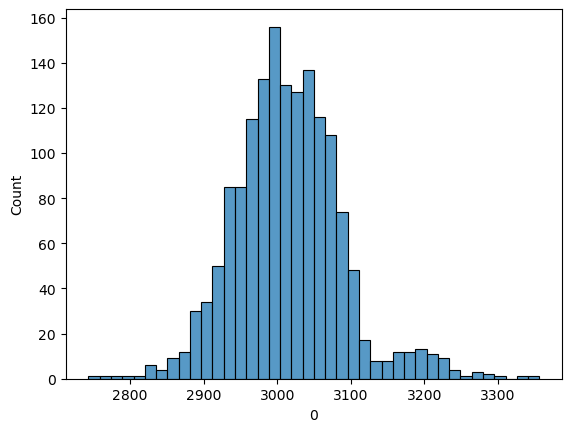

In [107]:
# CODE HERE
sns.histplot(data=df['0'])

<AxesSubplot:xlabel='0', ylabel='Count'>

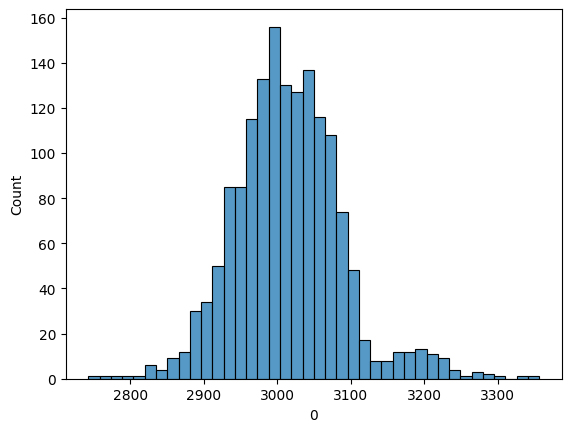

## 날짜형식 데이터 변환 월 / 요일 변수 추가 (완)

**df의 datetime 변수는 데이터가 수집 된 날짜 및 시간에 관한 데이터입니다.**  
**변수의 dtype을 확인하고 이를 datetime 형식으로 변환합니다. 변환 후 변수값을 호출하여 데이터타입이 잘 변환 되었는지 확인합니다.**

In [117]:
# CODE HERE
# to_datetime() 메소드에 dayfirst=True 옵션을 추가해서 변환 해주세요
# 현재 저장되어있는 datetime 변수의 날짜 형식에 맞춰 날짜 변환을 할 수 있습니다. (날짜-월-년)
df['datetime'] = pd.to_datetime(df['datetime'], dayfirst=True)
df['datetime']

0      2008-07-19 11:55:00
1      2008-07-19 12:32:00
2      2008-07-19 13:17:00
3      2008-07-19 14:43:00
4      2008-07-19 15:22:00
               ...        
1562   2008-10-16 15:13:00
1563   2008-10-16 20:49:00
1564   2008-10-17 05:26:00
1565   2008-10-17 06:01:00
1566   2008-10-17 06:07:00
Name: datetime, Length: 1567, dtype: datetime64[ns]

0      2008-07-19 11:55:00
1      2008-07-19 12:32:00
2      2008-07-19 13:17:00
3      2008-07-19 14:43:00
4      2008-07-19 15:22:00
               ...        
1562   2008-10-16 15:13:00
1563   2008-10-16 20:49:00
1564   2008-10-17 05:26:00
1565   2008-10-17 06:01:00
1566   2008-10-17 06:07:00
Name: datetime, Length: 1567, dtype: datetime64[ns]

## datetime에 함수를 적용하여 월 과 요일 정보를 추출하여 month, weekday 변수를 생성합니다. (완)
**변수 생성 이후 적용 된 변수를 호출하여 확인합니다.**

In [124]:
# CODE HERE
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday
df[['month', 'weekday']]

month  weekday
0         7        5
1         7        5
2         7        5
3         7        5
4         7        5
...     ...      ...
1562     10        3
1563     10        3
1564     10        4
1565     10        4
1566     10        4

[1567 rows x 2 columns]

month  weekday
0         7        5
1         7        5
2         7        5
3         7        5
4         7        5
...     ...      ...
1562     10        3
1563     10        3
1564     10        4
1565     10        4
1566     10        4

[1567 rows x 2 columns]

## 인덱스 설정 (완)

**datetime변수를 인덱스로 설정하면서 원본값에 적용한 후 첫 5개의 관측치를 확인합니다.**

In [142]:
# CODE HERE
# df.set_index('datetime', inplace=True) # 두번 실행하니 오류처럼 보여서 주석으로 해둡니다.
df.head()

0        1          2          3       4         6  \
datetime                                                                        
2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133   
2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433   
2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878   
2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367   
2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967   

                          7       8       9      10      11        12  \
datetime                                                                
2008-07-19 11:55:00  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396   
2008-07-19 12:32:00  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470   
2008-07-19 13:17:00  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179   
2008-07-19 14:43:00  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482   
2008-07-19 15:22:00  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424   

                          14        15       16      17        18       19  \
datetime                                                                     
2008-07-19 11:55:00   7.9558  414.8710  10.0433  0.9680  192.3963  12.5190   
2008-07-19 12:32:00  10.1548  414.7347   9.2599  0.9701  191.2872  12.4608   
2008-07-19 13:17:00   9.5157  416.7075   9.3144  0.9674  192.7035  12.5404   
2008-07-19 14:43:00   9.6052  422.2894   9.6924  0.9687  192.1557  12.4782   
2008-07-19 15:22:00  10.5661  420.5925  10.3387  0.9735  191.6037  12.4735   

                         20       21       22       23       24      25  \
datetime                                                                  
2008-07-19 11:55:00  1.4026 -5419.00  2916.50 -4043.75   751.00  0.8955   
2008-07-19 12:32:00  1.3825 -5441.50  2604.25 -3498.75 -1640.25  1.2973   
2008-07-19 13:17:00  1.4123 -5447.75  2701.75 -4047.00 -1916.50  1.3122   
2008-07-19 14:43:00  1.4011 -5468.25  2648.25 -4515.00 -1657.25  1.3137   
2008-07-19 15:22:00  1.3888 -5476.25  2635.25 -3987.50   117.00  1.2887   

                         26      27       28      29      30      31       32  \
datetime                                                                        
2008-07-19 11:55:00  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191  83.3971   
2008-07-19 12:32:00  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171  84.9052   
2008-07-19 13:17:00  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986  84.7569   
2008-07-19 14:43:00  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813  84.9105   
2008-07-19 15:22:00  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728  86.3269   

                         33       34       35       36       37       38  \
datetime                                                                   
2008-07-19 11:55:00  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555   
2008-07-19 12:32:00  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241   
2008-07-19 13:17:00  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327   
2008-07-19 14:43:00  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867   
2008-07-19 15:22:00  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468   

                           39     40     41        43       44        45  \
datetime                                                                   
2008-07-19 11:55:00  117.5132  61.29  4.515  352.7173  10.1841  130.3691   
2008-07-19 12:32:00  118.1188  78.25  2.773  352.2445  10.0373  133.1727   
2008-07-19 13:17:00  118.6128  14.37  5.434  364.3782   9.8783  131.8027   
2008-07-19 14:43:00  117.0442  76.90  1.279  363.0273   9.9305  131.8027   
2008-07-19 15:22:00  121.4364  76.39  2.209  353.3400  10.4091  176.3136   

                           46      47        48        50        51     53  \
datetime                                                                     
2008-07-19 11:55:00  723.3092  1.3072  141.2282  624.3145  218.3174  4.592   
2008-0

0        1          2          3       4         6  \
datetime                                                                        
2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133   
2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433   
2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878   
2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367   
2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967   

                          7       8       9      10      11        12  \
datetime                                                                
2008-07-19 11:55:00  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396   
2008-07-19 12:32:00  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470   
2008-07-19 13:17:00  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179   
2008-07-19 14:43:00  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482   
2008-07-19 15:22:00  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424   

                          14        15       16      17        18       19  \
datetime                                                                     
2008-07-19 11:55:00   7.9558  414.8710  10.0433  0.9680  192.3963  12.5190   
2008-07-19 12:32:00  10.1548  414.7347   9.2599  0.9701  191.2872  12.4608   
2008-07-19 13:17:00   9.5157  416.7075   9.3144  0.9674  192.7035  12.5404   
2008-07-19 14:43:00   9.6052  422.2894   9.6924  0.9687  192.1557  12.4782   
2008-07-19 15:22:00  10.5661  420.5925  10.3387  0.9735  191.6037  12.4735   

                         20       21       22       23       24      25  \
datetime                                                                  
2008-07-19 11:55:00  1.4026 -5419.00  2916.50 -4043.75   751.00  0.8955   
2008-07-19 12:32:00  1.3825 -5441.50  2604.25 -3498.75 -1640.25  1.2973   
2008-07-19 13:17:00  1.4123 -5447.75  2701.75 -4047.00 -1916.50  1.3122   
2008-07-19 14:43:00  1.4011 -5468.25  2648.25 -4515.00 -1657.25  1.3137   
2008-07-19 15:22:00  1.3888 -5476.25  2635.25 -3987.50   117.00  1.2887   

                         26      27       28      29      30      31       32  \
datetime                                                                        
2008-07-19 11:55:00  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191  83.3971   
2008-07-19 12:32:00  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171  84.9052   
2008-07-19 13:17:00  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986  84.7569   
2008-07-19 14:43:00  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813  84.9105   
2008-07-19 15:22:00  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728  86.3269   

                         33       34       35       36       37       38  \
datetime                                                                   
2008-07-19 11:55:00  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555   
2008-07-19 12:32:00  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241   
2008-07-19 13:17:00  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327   
2008-07-19 14:43:00  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867   
2008-07-19 15:22:00  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468   

                           39     40     41        43       44        45  \
datetime                                                                   
2008-07-19 11:55:00  117.5132  61.29  4.515  352.7173  10.1841  130.3691   
2008-07-19 12:32:00  118.1188  78.25  2.773  352.2445  10.0373  133.1727   
2008-07-19 13:17:00  118.6128  14.37  5.434  364.3782   9.8783  131.8027   
2008-07-19 14:43:00  117.0442  76.90  1.279  363.0273   9.9305  131.8027   
2008-07-19 15:22:00  121.4364  76.39  2.209  353.3400  10.4091  176.3136   

                           46      47        48        50        51     53  \
datetime                                                                     
2008-07-19 11:55:00  723.3092  1.3072  141.2282  624.3145  218.3174  4.592   
2008-0

# 분석을 위한 관측치 선택 및 집계값 계산

## 불량이 가장 많이 발생 한 요일 찾기 (완)

In [153]:
# CODE HERE 
# hint .idxmax() 메소드는 데이터 재구조화를 통해 생성 된 데이터프레임에서 최대값의 인덱스를 전달합니다.
# 0부터 월요일 6이 일요일입니다.
df.groupby('weekday').sum()['target'].idxmax()

6

6

## 요일별 정상제품, 불량제품의 생산량 막대그래프 시각화 (완)

<Axes: xlabel='weekday', ylabel='count'>

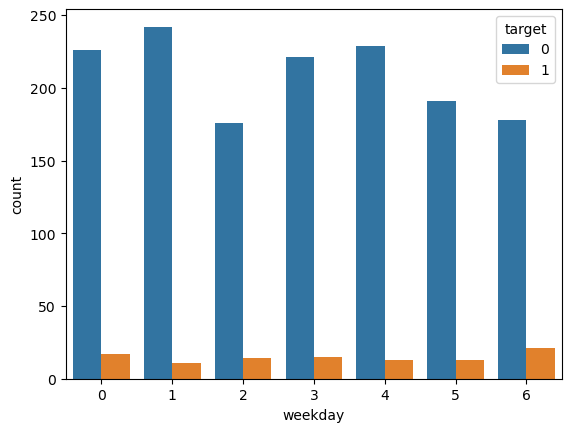

In [162]:
# CODE HERE
# df.head()
sns.countplot(data=df, x='weekday', hue='target')

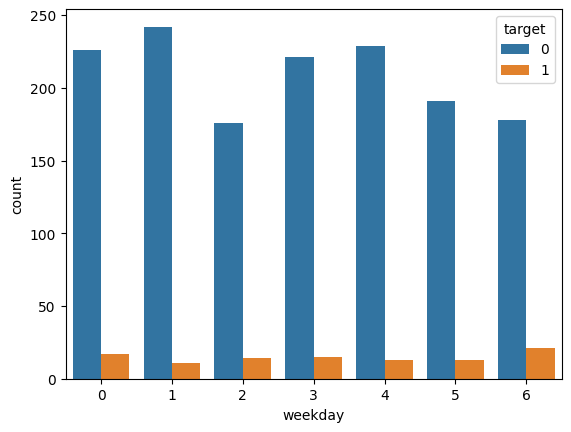

## 일요일 생산량의 불량 비율을 계산해 봅시다. (완)

In [211]:
# CODE HERE
len(df.loc[(df['weekday'] == 6) & (df['target'] == 1), 'weekday']) / len(df.loc[(df['weekday'] == 6)]) *100

10.552763819095476

10.552763819095476

## 정상, 불량 데이터별 59, 101번 공정 데이터의 평균과 분산을 확인하기 위한 데이터프레임 제작 (완)

In [212]:
df.head()

0        1          2          3       4         6  \
datetime                                                                        
2008-07-19 11:55:00  3030.93  2564.00  2187.7333  1411.1265  1.3602   97.6133   
2008-07-19 12:32:00  3095.78  2465.14  2230.4222  1463.6606  0.8294  102.3433   
2008-07-19 13:17:00  2932.61  2559.94  2186.4111  1698.0172  1.5102   95.4878   
2008-07-19 14:43:00  2988.72  2479.90  2199.0333   909.7926  1.3204  104.2367   
2008-07-19 15:22:00  3032.24  2502.87  2233.3667  1326.5200  1.5334  100.3967   

                          7       8       9      10      11        12  \
datetime                                                                
2008-07-19 11:55:00  0.1242  1.5005  0.0162 -0.0034  0.9455  202.4396   
2008-07-19 12:32:00  0.1247  1.4966 -0.0005 -0.0148  0.9627  200.5470   
2008-07-19 13:17:00  0.1241  1.4436  0.0041  0.0013  0.9615  202.0179   
2008-07-19 14:43:00  0.1217  1.4882 -0.0124 -0.0033  0.9629  201.8482   
2008-07-19 15:22:00  0.1235  1.5031 -0.0031 -0.0072  0.9569  201.9424   

                          14        15       16      17        18       19  \
datetime                                                                     
2008-07-19 11:55:00   7.9558  414.8710  10.0433  0.9680  192.3963  12.5190   
2008-07-19 12:32:00  10.1548  414.7347   9.2599  0.9701  191.2872  12.4608   
2008-07-19 13:17:00   9.5157  416.7075   9.3144  0.9674  192.7035  12.5404   
2008-07-19 14:43:00   9.6052  422.2894   9.6924  0.9687  192.1557  12.4782   
2008-07-19 15:22:00  10.5661  420.5925  10.3387  0.9735  191.6037  12.4735   

                         20       21       22       23       24      25  \
datetime                                                                  
2008-07-19 11:55:00  1.4026 -5419.00  2916.50 -4043.75   751.00  0.8955   
2008-07-19 12:32:00  1.3825 -5441.50  2604.25 -3498.75 -1640.25  1.2973   
2008-07-19 13:17:00  1.4123 -5447.75  2701.75 -4047.00 -1916.50  1.3122   
2008-07-19 14:43:00  1.4011 -5468.25  2648.25 -4515.00 -1657.25  1.3137   
2008-07-19 15:22:00  1.3888 -5476.25  2635.25 -3987.50   117.00  1.2887   

                         26      27       28      29      30      31       32  \
datetime                                                                        
2008-07-19 11:55:00  1.7730  3.0490  64.2333  2.0222  0.1632  3.5191  83.3971   
2008-07-19 12:32:00  2.0143  7.3900  68.4222  2.2667  0.2102  3.4171  84.9052   
2008-07-19 13:17:00  2.0295  7.5788  67.1333  2.3333  0.1734  3.5986  84.7569   
2008-07-19 14:43:00  2.0038  7.3145  62.9333  2.6444  0.2071  3.3813  84.9105   
2008-07-19 15:22:00  1.9912  7.2748  62.8333  3.1556  0.2696  3.2728  86.3269   

                         33       34       35       36       37       38  \
datetime                                                                   
2008-07-19 11:55:00  9.5126  50.6170  64.2588  49.3830  66.3141  86.9555   
2008-07-19 12:32:00  9.7997  50.6596  64.2828  49.3404  64.9193  87.5241   
2008-07-19 13:17:00  8.6590  50.1530  64.1114  49.8470  65.8389  84.7327   
2008-07-19 14:43:00  8.6789  50.5100  64.1125  49.4900  65.1951  86.6867   
2008-07-19 15:22:00  8.7677  50.2480  64.1511  49.7520  66.1542  86.1468   

                           39     40     41        43       44        45  \
datetime                                                                   
2008-07-19 11:55:00  117.5132  61.29  4.515  352.7173  10.1841  130.3691   
2008-07-19 12:32:00  118.1188  78.25  2.773  352.2445  10.0373  133.1727   
2008-07-19 13:17:00  118.6128  14.37  5.434  364.3782   9.8783  131.8027   
2008-07-19 14:43:00  117.0442  76.90  1.279  363.0273   9.9305  131.8027   
2008-07-19 15:22:00  121.4364  76.39  2.209  353.3400  10.4091  176.3136   

                           46      47        48        50        51     53  \
datetime                                                                     
2008-07-19 11:55:00  723.3092  1.3072  141.2282  624.3145  218.3174  4.592   
2008-0

In [222]:
# CODE HERE
df.groupby('target').agg({'59':['mean', 'var'],
                         '101':['mean', 'var']})

59                   101              
            mean         var      mean           var
target                                              
0       2.565363   86.319691 -0.000006  5.036360e-08
1       8.515123  116.690631 -0.000028  2.280713e-08

59                   101              
            mean         var      mean           var
target                                              
0       2.565363   86.319691 -0.000006  5.036360e-08
1       8.515123  116.690631 -0.000028  2.280713e-08

## 월별, 요일별 불량데이터 발생 건수를 확인하기 위한 데이터프레임을 제작 (완)

In [223]:
# CODE HERE fill_value=0 파라메터를 사용하시면 NaN 값을 0 으로 채워 표시가 가능합니다.
df.pivot_table(index='month',
              columns='weekday',
              values='target',
              aggfunc='sum')

weekday  0  1  2  3  4  5   6
month                        
7        3  4  2  1  1  3   0
8        7  4  7  5  8  7  13
9        2  2  3  2  4  2   2
10       5  1  2  7  0  1   6

weekday  0  1  2  3  4  5   6
month                        
7        3  4  2  1  1  3   0
8        7  4  7  5  8  7  13
9        2  2  3  2  4  2   2
10       5  1  2  7  0  1   6

# 수고하셨습니다